# Kaggle競賽-鐵達尼號生存預測
reference: https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC4-1%E8%AC%9B-kaggle%E7%AB%B6%E8%B3%BD-%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%94%9F%E5%AD%98%E9%A0%90%E6%B8%AC-%E5%89%8D16-%E6%8E%92%E5%90%8D-a8842fea7077

In [3]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None

In [4]:
train = pd.read_csv("Titanic/train.csv")
test = pd.read_csv("Titanic/test.csv")
submit = pd.read_csv('Titanic/gender_submission.csv')

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 資料初步了解
### 乘客的資訊 : 性別、姓名、出發港口、住的艙等、房間號碼、年齡、兄弟姊妹＋老婆丈夫數量(Sibsp)、父母小孩的數量(parch)、票的費用、票的號碼這些,用這些資訊預估這個乘客是否會在鐵達尼號沈船的意外中生存下來。

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
#合併資料
#Age 有空值
data = train.append(test)
data.reset_index(inplace=True, drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [19]:
# age 為 NaN
data_age_nan = data[np.isnan(np.array(data["Age"]))]
# df_age_nan.describe()
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


## Data Analysis

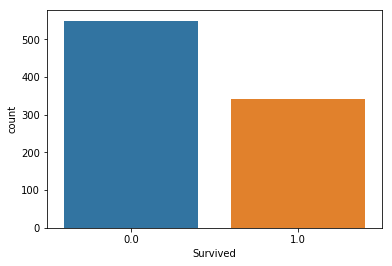

In [20]:
sns.countplot(data['Survived'])

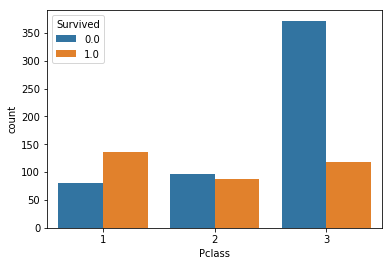

In [21]:
sns.countplot(data['Pclass'], hue=data['Survived'])

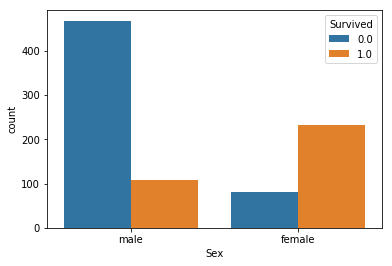

In [22]:
sns.countplot(data['Sex'], hue=data['Survived'])

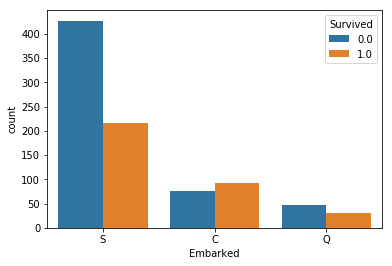

In [23]:
sns.countplot(data['Embarked'], hue=data['Survived'])

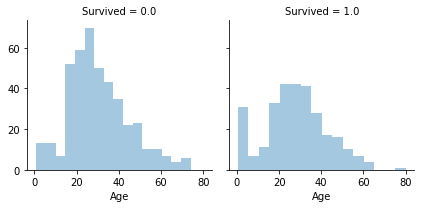

In [24]:
# sns.countplot(data['Age'], hue=data['Survived'])
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

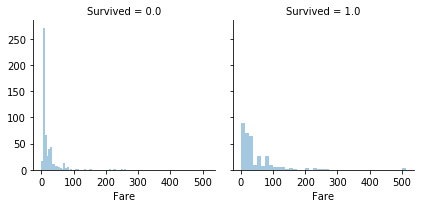

In [25]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

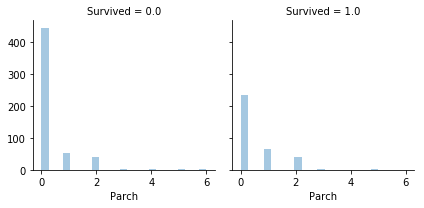

In [26]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

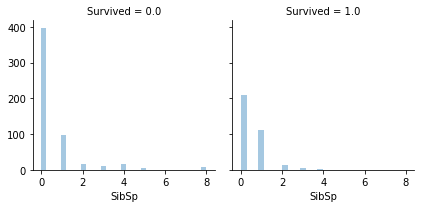

In [27]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

In [28]:
data['Family_Size'] = data['Parch'] + data['SibSp']

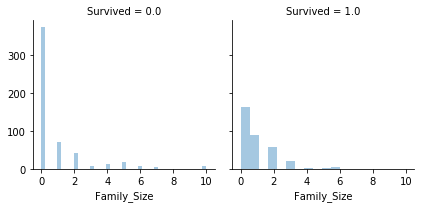

In [29]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

## Feature Engineering

In [30]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]
data['Title1'].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: Title1, dtype: object

In [31]:
data['Title1'] = data['Title1'].str.split(".", expand=True)[0]
data['Title1'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title1, dtype: object

In [32]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [33]:
# pd.crosstab(data['Title1'],data['Sex']).T
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [34]:
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [35]:
data.groupby(['Title1'])["Age"].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [36]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,Mr


In [37]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [38]:
data.groupby('Title2')['Age'].mean()

Title2
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [39]:
data.groupby(['Title2','Pclass'])['Age'].mean()

Title2  Pclass
Master  1          6.984000
        2          2.757273
        3          6.090000
Miss    1         30.131148
        2         20.865714
        3         17.360874
Mr      1         42.241497
        2         32.914966
        3         28.318910
Mrs     1         42.802817
        2         33.518519
        3         32.326531
Name: Age, dtype: float64

In [40]:
#Checking the Initials with the Sex
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r') 

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [41]:
#Checking the Initials with the Sex
pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap='summer_r') 

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,87,102


In [42]:
list(data.groupby(['Title2','Pclass'])['Age'].mean().iteritems())

[(('Master', 1), 6.984),
 (('Master', 2), 2.7572727272727273),
 (('Master', 3), 6.090000000000001),
 (('Miss', 1), 30.131147540983605),
 (('Miss', 2), 20.865714285714287),
 (('Miss', 3), 17.36087378640777),
 (('Mr', 1), 42.24149659863946),
 (('Mr', 2), 32.914965986394556),
 (('Mr', 3), 28.318910256410255),
 (('Mrs', 1), 42.80281690140845),
 (('Mrs', 2), 33.51851851851852),
 (('Mrs', 3), 32.326530612244895)]

In [44]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr,Mr,A5
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs,Mrs,PC
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,Miss,STONO2
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs,Mrs,X
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,Mr,X


## Missing Value-embarked、Fare、Age

In [46]:
data['Embarked'] = data['Embarked'].fillna('S')
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [47]:
data["Cabin"].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

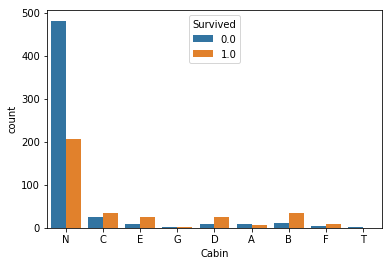

In [48]:
sns.countplot(data['Cabin'], hue=data['Survived'])

In [49]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,22.0,7,2,7.2500,"Braund, Mr. Owen Harris",0,1,2,1,1,0.0,A/5 21171,1,12,2,2
1,38.0,2,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,0,1,1.0,PC 17599,1,13,3,14
2,26.0,7,2,7.9250,"Heikkinen, Miss. Laina",0,3,2,0,0,1.0,STON/O2. 3101282,0,9,1,31
3,35.0,2,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,0,1,1.0,113803,1,13,3,36
4,35.0,7,2,8.0500,"Allen, Mr. William Henry",0,5,2,1,0,0.0,373450,0,12,2,36


In [50]:
#使用隨機森林來推測年齡

dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|
                      (np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))                     
                     ]
rfModel_age = RandomForestRegressor(n_estimators=2000, random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

In [51]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,41.326267,7,1,8.4583,"Moran, Mr. James",0,6,2,1,0,0.0,330877,0,12,2,36
1,41.616486,7,2,13.0000,"Williams, Mr. Charles Eugene",0,18,1,1,0,1.0,244373,0,12,2,36
2,46.792625,7,0,7.2250,"Masselmani, Mrs. Fatima",0,20,2,0,0,1.0,2649,0,13,3,36
3,41.326267,7,0,7.2250,"Emir, Mr. Farred Chehab",0,27,2,1,0,0.0,2631,0,12,2,36
4,34.860886,7,1,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,2,0,0,1.0,330959,0,9,1,36


In [52]:
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTrain.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')

In [53]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]

In [54]:
dataTrain.head()

,Survived,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
263,0.0,22.0,2,7.2500,2,1,1,2,2,7
264,1.0,38.0,0,71.2833,0,0,1,3,14,2
265,1.0,26.0,2,7.9250,2,0,0,1,31,7
266,1.0,35.0,2,53.1000,0,0,1,3,36,2
267,0.0,35.0,2,8.0500,2,1,0,2,36,7


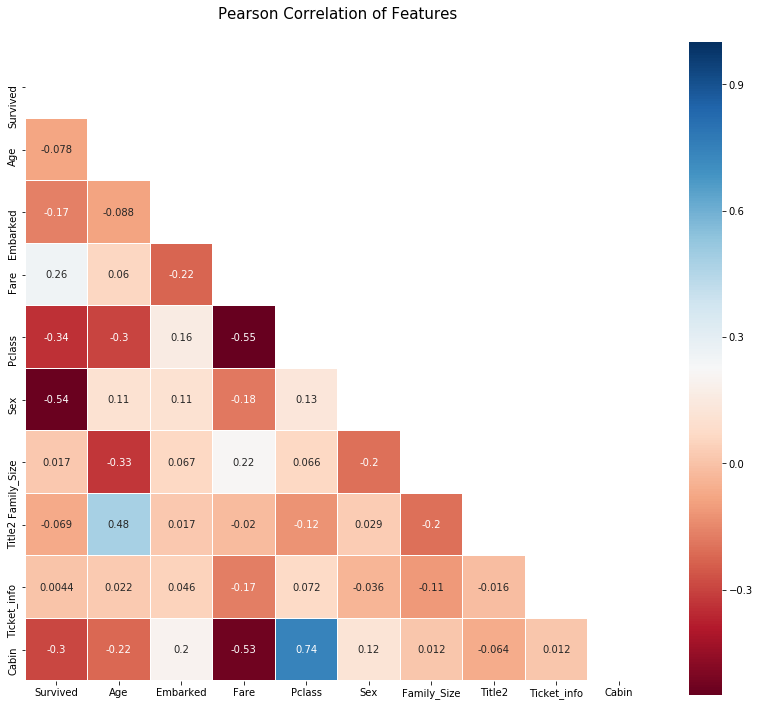

In [55]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)

# Compute the correlation matrix
corr = dataTrain.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(dataTrain.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white',mask=mask, annot=True)

In [56]:
dataTest.head()

,Age,Embarked,Fare,Pclass,Sex,Family_Size,Title2,Ticket_info,Cabin
977,34.5,1,7.8292,2,1,0,2,36,7
978,47.0,2,7.0000,2,0,1,3,36,7
979,62.0,1,9.6875,1,1,0,2,36,7
980,27.0,2,8.6625,2,1,0,2,36,7
981,22.0,2,12.2875,2,0,2,3,36,7


## Model Training

In [58]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=12,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


In [59]:
rf.score(dataTrain.iloc[:, 1:], dataTrain.iloc[:, 0])

0.9068462401795735

In [63]:
feature_importances_ = pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]
feature_importances_
# plt.hist(feature_importances_)
# plt.show()

,variable,importance
4,Sex,0.264997
2,Fare,0.163890
6,Title2,0.152698
0,Age,0.131891
3,Pclass,0.091048
5,Family_Size,0.070839
8,Cabin,0.067029
7,Ticket_info,0.031735
1,Embarked,0.025873


## Submit

In [65]:
# score: 0.79904
rf_res =  rf.predict(dataTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)
submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
# dataTest.insert(loc =0,column='Survived',value=submit["Survived"])

In [47]:
# dataTest.head()

# XGBoost

In [66]:
from xgboost import XGBClassifier
xgbc = XGBClassifier( 
learning_rate = 0.02,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)

X_train = dataTrain.iloc[:, 1:]
y_train = dataTrain.iloc[:, 0]
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.9, learning_rate=0.02,
       max_delta_step=0, max_depth=4, min_child_weight=2, missing=None,
       n_estimators=2000, n_jobs=1, nthread=-1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.8)

In [89]:
# submit  score: 0.77511
xgb_res =  xgbc.predict(dataTest)
submit['Survived'] = xgb_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)

print('The accuracy of eXtreme Gradient Boosting Classifier on testing set:', xgbc.score(X_train, y_train))

The accuracy of eXtreme Gradient Boosting Classifier on testing set: 0.9315375982042648


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
